Assignment 3

## GitHub User Name: aton-physics

## Email: andrew_ton@brown.edu


In [4]:
# Keep import statement in their own cell at the top
import matplotlib.pyplot as plt # for plotting          
import numpy as np

# import our Pendulum class from Particle1D
from Particle1D import Pendulum
%matplotlib inline  

## Problem 1

a) Calculate the phase difference between two pendulums nearby in the chaotic regime.

b) Plot log of phase difference versus time, qualitatively noting the slope of this semilog plot as the Lyapunov Exponent.

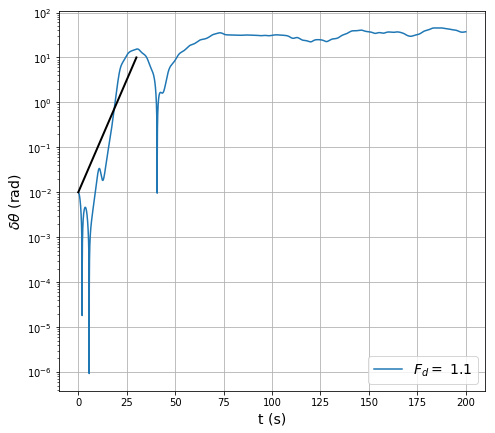

In [2]:
# Driving force amplitude
Fd = 1.1

# Initial theta
theta0 = 0.2

# Difference in initial position
delta_theta0 = 0.01


tf = 200
dt = 0.01

# Initialize objects and calculate trajectories
p1 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0, tf = tf, dt = dt)
p2 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0+delta_theta0, tf = tf, dt = dt)
p1.scipy_trajectory()
p2.scipy_trajectory()

# difference between two directorys
delta_theta = np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])

# Make Plot    
fig = plt.figure(figsize = [8,6])
ax = fig.subplots(1,1)

# plot on a log scale
ax.semilogy(p1.tarray, delta_theta, label = "$F_d =$ {}".format(Fd))

ax.set_ylabel('$\delta \\theta$ (rad)', fontsize = 14)
ax.set_xlabel('t (s)', fontsize = 14)
ax.legend(loc = 4, fontsize = 14)
    
fig.subplots_adjust(top = 0.96, bottom =0.08, left = 0.24, right =0.98)
plt.grid()
plt.plot([0, 30], [10**-2, 10], 'k-', lw=2)
plt.show()


Recall that the lyapunov exponent appears in the following relation: $log(\delta\theta) \sim \lambda t$ so to extract it from the data we can simply plot the phase difference between the pendulums on a semi-log plot. If one can identify the linear regime of this semilog plot, one can simply read off the lyapunov exponent for a qualitative estimate. Here I count a slope of about 3, so the lyapunov exponent is given by $\lambda \approx$ 3 Hz (units come from demanding $\lambda t$ is dimensionless)

## Problem 2

a) Calculate Poincare sections of the pendulum as it undergoes period-doubling to chaos

things to note: Plot $\omega$ versus $\theta$ with one point plotted for each drive cycle for Driving force 1.4, 1.44, 1.465, 1.481, 1.49 with the parameters of the problem.

The attractor in the period-1 regime only contains a single point. Remove points from the initial transient.

Extract points for the poincare section small enough with respect to the step size.


In [187]:
import importlib
import Particle1D
from Particle1D import Pendulum
importlib.reload(Particle1D)

<module 'Particle1D' from '/home/jovyan/Lectures/Assignments/Particle1D.py'>

done
done
done
done
done


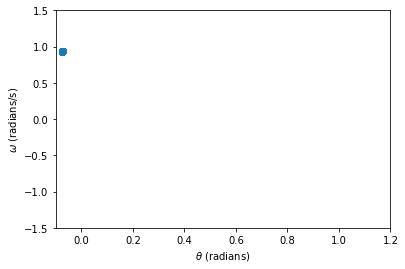

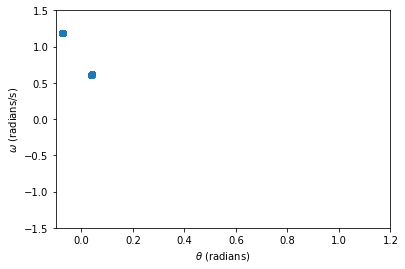

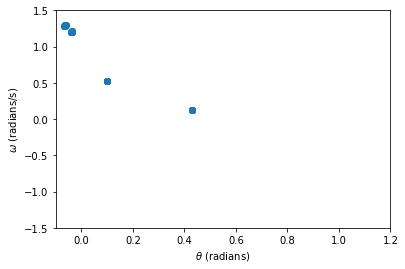

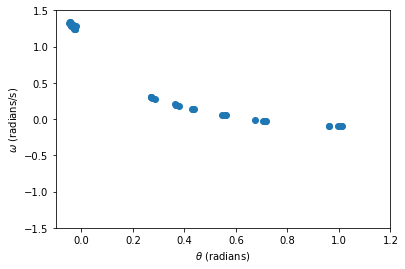

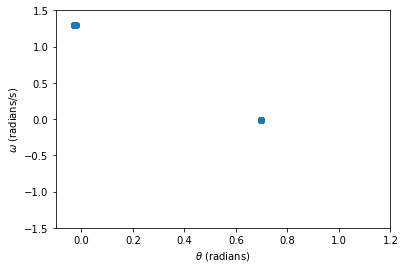

In [188]:
Fd = [1.4, 1.44, 1.465, 1.481, 1.49]
theta0 = 0.2
tf = 1000
dt = 0.005

# Initialize objects and calculate trajectories
for it in range(len(Fd)):
    p1 = Pendulum(nu = 1/2, Fd = Fd[it], omega_d = 2/3 , x0 = theta0, tf = tf, dt = dt)
    p1.scipy_trajectory()
    print('done')
    p1.plot(pt = 'phase')
    #p1.plot(pt = 'trajectory')

As one can see, by taking the Poincare section which consists of an $\omega$ vs $\theta$ plot with one point plotted per drive cycle (time approximately an integer times 2*pi divided by the natural frequency of the pendulum), the pendulum undergoes period doubling. In the period 1 regime, one can confirm that the poincare section only gives a single unique point (within numerical accuracy). 

## Problem 3

a) For the pendulum, plot x$_n$ vs $\mu$ which is the bifurcation diagram for the logistic map. 

b) Estimate the Feigenbaum parameter.

In [5]:
import importlib
import Particle1D
from Particle1D import Pendulum
importlib.reload(Particle1D)
import LogisticMap as lm

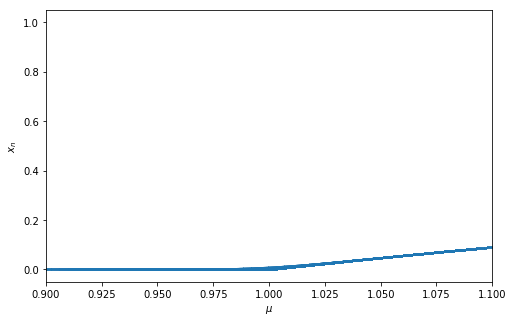

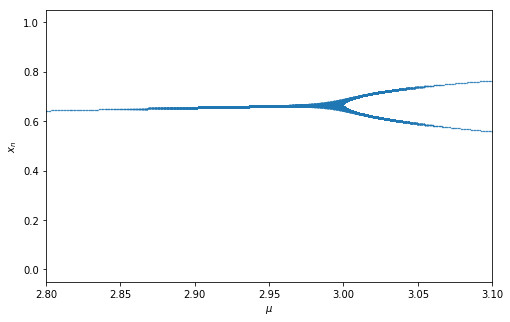

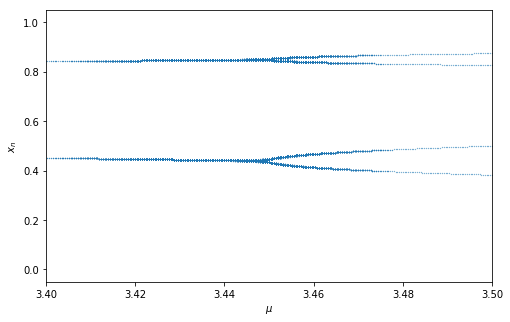

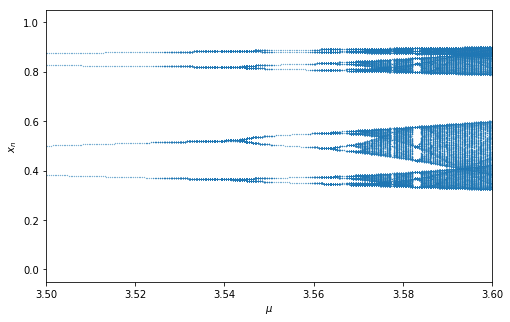

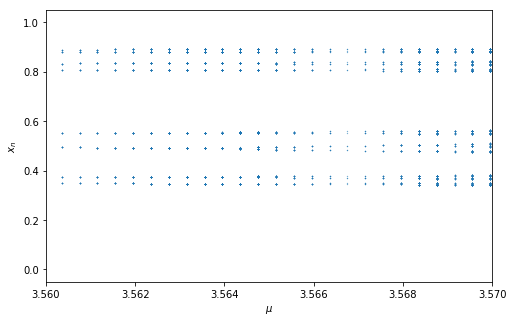

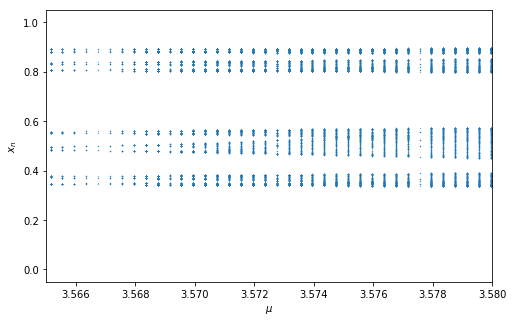

In [6]:
# Generate a bifurcation diagram
mu_start = 0
mu_stop = 4
mu_steps = 10000

x0 = 0.8 

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
mu_list = []
m_list = []


for mu in mus:
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    m_points = np.array(m.xList)
    m_points = np.unique(np.round(m_points,8))
    
    for m in m_points:
        mu_list.append(mu)
        m_list.append(m)
        
low_bound = [0.9, 2.8, 3.4, 3.5, 3.56, 3.565]
up_bound = [1.1, 3.1, 3.5, 3.6, 3.57, 3.58]
for it in range(len(low_bound)):
    fig = plt.figure(figsize = [8,5])
    ax = fig.add_subplot(111)
    ax.plot(mu_list, m_list,'.', markersize = 0.5)
    ax.set_xlabel('$\mu$')
    ax.set_ylabel('$x_n$')
    plt.xlim(low_bound[it],up_bound[it])


To calculate the Feigenbaum parameter $\delta$, we use its definition

$$\delta = \lim_{n\to\infty} \frac{\mu_{n}-\mu_{n-1}}{\mu_{n+1}-\mu_{n}}$$

As recommended, this number can be estimated by looking at a finite number (n = 8) of bifurcations.

In [9]:
def feigen(a,b,c):
    return (b-a)/(c-b)
mu=[1.0, 2.97, 3.450, 3.545, 3.565]
for it in range(3):
    print(feigen(mu[0+it], mu[1+it], mu[2+it]))

4.104166666666667
5.0526315789473815
4.749999999999983


This value for the feigenbaum parameter $\delta_{approx} = 4.75$ is not far off from the literature value $\delta = 4.669$, so we conclude that we reproduce the literature value. We can get a better approximation by increasing the resolution of $\mu$ or using special data types with more precision.